In [29]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import itertools
import numpy.matlib

% matplotlib inline

## Mean-field spin glass model

Hamiltonian for a spin glass system with random interactions:

$H = - \sum _ { \mathrm { ij } } J _ { \mathrm { ij } } \sigma _ { \mathrm { i } } \sigma _ { \mathrm { j } }$

where $J_{ij}$ is the coupling between spin position $i$ and $j$ and is drawn from a Gaussian distribution. Ising spins $\sigma _ { \mu } = \pm 1$ at site $\mu$ are observed.

In [2]:
N = 10  #small number of spins
Jij = np.random.randn(N,N)  #random Jij couplings
Jij = Jij-np.diag(Jij)  #remove self-coupling

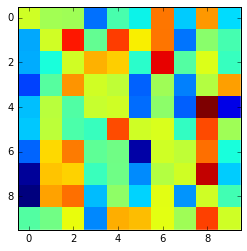

In [3]:
plt.imshow(Jij,interpolation='None')

In [4]:
#enumerate energy
allcomb = list(map(list, itertools.product([-1, 1], repeat=10)))  #all binary combinations
allE = np.zeros(2**N)
for i,ij in enumerate(allcomb):
    sij = np.array(ij)
    allE[i] = - sij @ Jij @ sij.T

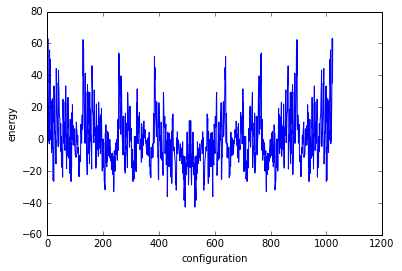

In [5]:
plt.plot(allE)
plt.xlabel('configuration')
plt.ylabel('energy')

## Scaling of ground-state energy

In [18]:
#scaling of ground-state energy
ns = np.arange(2,19,2)  #can increase scanning with better computation power...
rep = 10
gstates = np.zeros((rep,len(ns)))
for ni,nn in enumerate(ns):
    for rr in range(0,rep):
        Jij = np.random.randn(nn,nn)  #random Jij couplings
        Jij = Jij-np.diag(Jij)  #remove self-coupling
        allcomb = list(map(list, itertools.product([-1, 1], repeat=nn)))  #all binary combinations
        allE = np.zeros(2**nn)
        for i,ij in enumerate(allcomb):
            sij = np.array(ij)
            allE[i] = - sij @ Jij @ sij.T
        gstates[rr,ni] = np.min(allE)

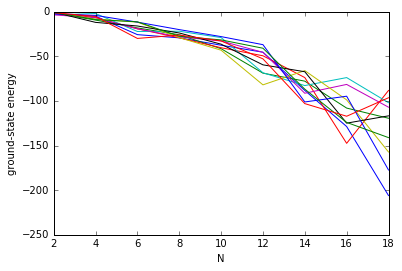

In [19]:
plt.plot(ns,np.array(gstates).T);
plt.xlabel('N')
plt.ylabel('ground-state energy')

In [25]:
#scaling of ground-state energy, with 1/N variance
ns = np.arange(2,19,2)  #can increase scanning with better computation power...
rep = 10
gstates2 = np.zeros((rep,len(ns)))
for ni,nn in enumerate(ns):
    for rr in range(0,rep):
        Jij = np.random.randn(nn,nn)*(1/nn)  #random Jij couplings, scaling of variance with 1/N!!
        Jij = Jij-np.diag(Jij)  #remove self-coupling
        allcomb = list(map(list, itertools.product([-1, 1], repeat=nn)))  #all binary combinations
        allE = np.zeros(2**nn)
        for i,ij in enumerate(allcomb):
            sij = np.array(ij)
            allE[i] = - sij @ Jij @ sij.T
        gstates2[rr,ni] = np.min(allE)

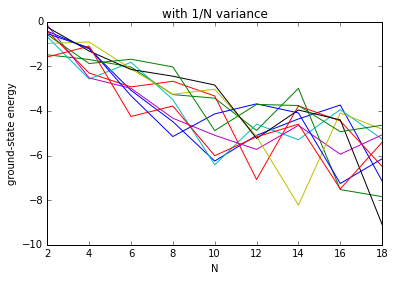

In [26]:
plt.plot(ns,np.array(gstates2).T);
plt.xlabel('N')
plt.ylabel('ground-state energy')
plt.title('with 1/N variance')

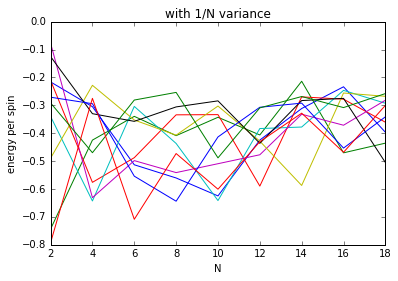

In [37]:
#energy per spin
epers = gstates2/np.matlib.repmat(ns,rep,1)
plt.plot(ns,epers.T);
plt.xlabel('N')
plt.ylabel('energy per spin')
plt.title('with 1/N variance')

#-->yes, on the scale near -1 per spin

## Gap $\Delta$ between the ground state and the first excited state

In [53]:
ns = np.arange(2,19,2)  #can increase scanning with better computation power...
rep = 10
gap = np.zeros((rep,len(ns)))
for ni,nn in enumerate(ns):
    for rr in range(0,rep):
        Jij = np.random.randn(nn,nn)*(1/nn)  #random Jij couplings, scaling of variance with 1/N!!
        Jij = Jij-np.diag(Jij)  #remove self-coupling
        allcomb = list(map(list, itertools.product([-1, 1], repeat=nn)))  #all binary combinations
        allE = np.zeros(2**nn)
        for i,ij in enumerate(allcomb):
            sij = np.array(ij)
            allE[i] = - sij @ Jij @ sij.T
        sort = np.unique(allE)
        gap[rr,ni] = sort[1]-sort[0]

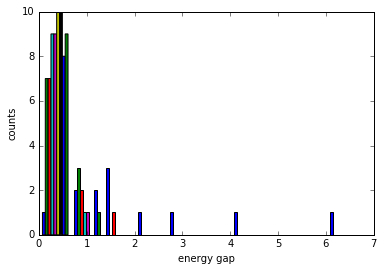

In [57]:
plt.hist(gap);
plt.xlabel('energy gap')
plt.ylabel('counts')

## Low-energy configuration

In [38]:
ns = np.arange(2,19,2)  #can increase scanning with better computation power...
rep = 1
store = []
for ni,nn in enumerate(ns):
    for rr in range(0,rep):
        Jij = np.random.randn(nn,nn)*(1/nn)  #random Jij couplings, scaling of variance with 1/N!!
        Jij = Jij-np.diag(Jij)  #remove self-coupling
        allcomb = list(map(list, itertools.product([-1, 1], repeat=nn)))  #all binary combinations
        allE = np.zeros(2**nn)
        for i,ij in enumerate(allcomb):
            sij = np.array(ij)
            allE[i] = - sij @ Jij @ sij.T
        pos = np.argmin(allE)
        store.append(allcomb[pos])

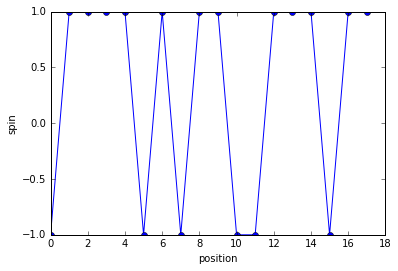

In [45]:
plt.plot(store[-1],'-o')
plt.xlabel('position')
plt.ylabel('spin')